<a href="https://colab.research.google.com/github/rafiag/DTI-Linear-Regression/blob/main/002_Multi_Linear_Regression_(EN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

# **Multi-Linear Regression using Python**

*by: Rafi Atha Ganiza*

---

This notebook are created to demonstrate multi-linear regression analysis by using Python. Regression analysis itself is a tool for building statistical models that characterize relationships among a dependent variable and one or more independent variables. Regression can help us understand relationships among variables in the data we have. **Simple Linear Regression** refers to the method used when there is only one independent variable, while **Multi-Linear Regression** refers to the method used when there are more than one independent variable. Multi-Linear Regression can be written as below:

<div align="center">
$\hat{y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{k}X_{k}$
</div>

*where:*

*$\hat{y}:$ dependent variable (predicted value)*

*$\beta_{0}:$ estimated intercept*

*$\beta_{k}X_{k}:$ estimated slope coefficient*

In this example we will try to use multi-linear regression to analyze the relationship of a product's price, advertisement cost, and the product sales number. We will also try to predict how much products will be sold given specific product's price and advertisement cost.

# Preparation
In the cell code below we will load some Python libraries we will be using, such as Pandas, NumPy, matplotlib, sklearn, etc. We will also load our dataset from GitHub into a dataframe called `df_pie` by using the Pandas library.

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/data/pie-sales.csv', 
                     index_col='week', sep=';')

print(df_pie.shape)
df_pie

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


As seen above our dataset consist of 3 columns (pie_sales, price, and advertising) and 15 rows. We will try to predict how much pie will be sold depending on it's price and advertisement cost.

# Descriptive Analysis

Before going deeper into using multi-linear regression, it's always a good idea to simply visualize our data to understand it better and see if there are any relationship between each variables. To do this we will use the `pairplot()` function from the Seaborn library. The function will output a figure containing histogram and scatter plot between each variable.

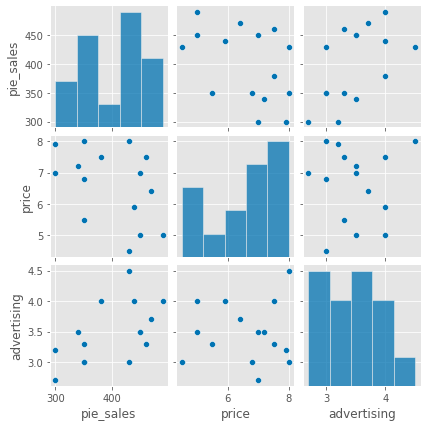

In [2]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=2)

Looking at first row in the figures we can see that there might be relations between price, advertising, and pie_sales. The scatter plot between pie sales and price display pattern of negative relation, which means the higher the price the lower the sales will be. In the other hand the scatter plot between advertising and pie sales display a positive relation, the more money we spent on advertising the more pie we will sells.

# Building Regression Model

Since we are already sure that there are relations between our independent and dependent variables, let's continue to building our regression model. In this notebook we will use the `LinearRegression()` function from the skelearn library to build and analyze our models.

In [3]:
# Set independent and dependent variables
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 306.5261932837436
Coefficients: [-24.97508952  74.13095749]


The code above printed a couple of important things from our model. The first couple lines display the intercept and coefficients values of the models which can be put in mathematic equation as below:

<div align="center"> $\hat{y} = 306.5261 - 24.975X_{1} + 74.1309X_{2}$ </div>

Let's breakdown what each of those number means:

*   The intercept value is the estimated average value of $y$ when both of our $x$ values is 0. In our case this means that in the case we sell our pie at price of 0 and spent advertising expense of 0 we will sell about 306 pies.
*   For the coefficients we have 2 values for the price and advertising variables respectively. This value represent the relation of our independent variable to the dependent variable, where a change of exactly 1 at the independent variable will change the value of our dependent variable the same amount as the coefficient. For example if we increase our advertising expense by 10 we will also increase our sales by about 741 pies (74.1309 * 10).

Now, let's try to predict our pie sales in a scenario where we set our price at 6.5 and advertising expense at 8.

In [4]:
# Values to predict
price = input('What is the price of the pie? \n')
advertising = input('How much money are you going to spend for advertising? \n')

try:
    print('We predict {:.0f} pies will be sold if we sold the pie at ${} and spend ${} at advertising.'.format(
        model.predict([[float(price), float(advertising)]])[0],
        price, 
        advertising))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

What is the price of the pie? 
5
How much money are you going to spend for advertising? 
6.8
We predict 686 pies will be sold if we sold the pie at $5 and spend $6.8 at advertising.


Before going into the next step we will try to visualize our model into 3D graph with the code cell below. We will draw the linear model as a blue plane and we will plot our data point in the graph as grey dot. 

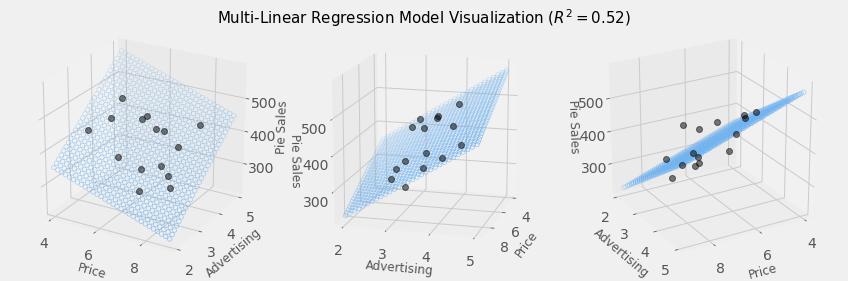

In [5]:
# Prepare data
X = df_pie[['price', 'advertising']].values.reshape(-1,2)
Y = df_pie['pie_sales']

# Create some random values for prediction
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(4, 9, 30)  # range of price values
yy_pred = np.linspace(2, 5, 30)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

Here is the full 360° view of the model visualization:

<div align="center">
<img src="https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/Multi-Linear%20Regression%20Model%20Visualization.gif" height='300'><img src="/Multi-Linear%20Regression%20Model%20Visualization.gif?raw=true"><br>
<a href='https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/Multi-Linear%20Regression%20Model%20Visualization.gif'>Click here if the image failed to load.</a>
<div>

# Model Validation

After buildiong the model it is important for us to validate it's performance. We can evaluate a model by looking at it's coefficient of determination ($R^2$), F-test, t-test, and also assumption testing. Before we continue we will rebuild our model using the statsmodel library with the `OLS()` function. Then we will print the odel summary using the `summary()` function on the model. The model summary contains lots of important value to evaluate our model.

In [6]:
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_pie['pie_sales'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Tue, 20 Oct 2020   Prob (F-statistic):             0.0120
Time:                        12:33:44   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        306.5262    114.254      2.683      0.0

## Coefficient of Determination ($R^2$)

Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable.  $R^2$ scores are calculated as below:

<div align="center"> $R^2 = \frac{\sum(\hat{Y_i}-\bar{Y})^2}{\sum(Y_i-\bar{Y})^2}$ </div>

In statsmodel we can obtain the $R^2$ value of our model by accesing the `.rsquared` attribute of the our model.

In [7]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.5214779360292285


$R^2$ range between 0 and 1, where $R^2=0$ means there are no linear relationship between the variables and $R^2=1$ shows a perfect linear relationship. In our case, we got $R^2$ score about 0.5214 which means 52.14% of our dependent variable can be explained using our independent variables.

## F-test (ANOVA)

F-test or ANOVA (Analysis of variance) in multi-linear regression can be used to determine wheter our complex model perform better than a simpler model (e.g. model with only one dependent variable). With F-test we can calculate the probability of observing an F-statistic that is at least as high as the value that our model obtained. Similar to $R^2$ score, we can easily get the F-statistic and probability of said F-statistic by accessing the `.fvalue` and `.f_pvalue` attribute of our model as below.

In [8]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 6.538606789020464
Probability of observing value at least as high as F-statistic: 0.01200637223318641


Because our f_pvalue is lower than 0.05 we can conclude that our model is significant.

## T-test

The t statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. Same as the F-test, the p-value show the probability of seeing a result as extreme as the one our model we have. We can also get the p-value for all of our variables by calling the `.pvalues` attribute on the model. 

In [9]:
print(olsmod.pvalues)

const    0.019932
x1       0.039788
x2       0.014494
dtype: float64


Both of our independend variables, x1 and x2 (price and advertising), have p-value less than 0.05 which shows that **there is sufficient evidence that price and advertising affects our pie sales.**

## Assumption Testing

Next, we will validate our model by doing residual analysis, below are the list of test or assumption we will do to check on our model validity:

1.   Linearity
2.   Normality of Residual
3.   Multicollinearity
4.   Autocorrelation
5.   Homoscedasticity

Residual is the difference between the observed value and predicted value from our dataset. With statsmodel we can easily get the residual value of our model by simply accesing the `.resid` attribute of the model and then we can keep it in a new column called 'residual' in our `df_pie` dataframe.



In [10]:
df_pie['pie_sales_pred'] = olsmod.predict(X)
df_pie['residual'] = olsmod.resid
df_pie.head()

,pie_sales,price,advertising,pie_sales_pred,residual
week,,,,,
1,350,5.5,3.3,413.795361,-63.795361
2,460,7.5,3.3,363.845182,96.154818
3,350,8.0,3.0,329.118350,20.881650
4,430,8.0,4.5,440.314786,-10.314786
5,350,6.8,3.0,359.088457,-9.088457


### Linearity Assumption

This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables we can do this by using a scatter plot to see our predicted values versus the actual values.

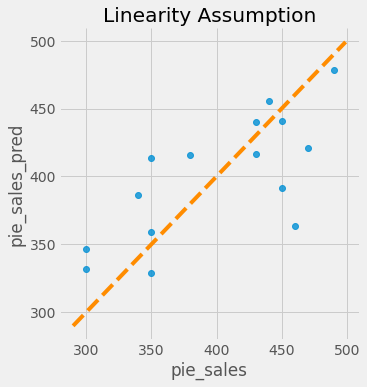

In [11]:
# Plotting the observed vs predicted values
sns.lmplot(x='pie_sales', y='pie_sales_pred', data=df_pie, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_pie[['pie_sales', 'pie_sales_pred']].min().min()-10, 
                        df_pie[['pie_sales', 'pie_sales_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Linearity Assumption')
plt.show()

The scatter plots show residual point spread around the diagonal line, so we can assume that **there is linear relationship between our independent and dependent variables.**

### Normality Assumption

This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. We will use the `normal_ad()` function from statsmodel to calculate our p-value and then compare it to threshold of 0.05, if the p-value we get is higher than the threshold then we can assume that our residual is normally distributed.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.6655438857701688


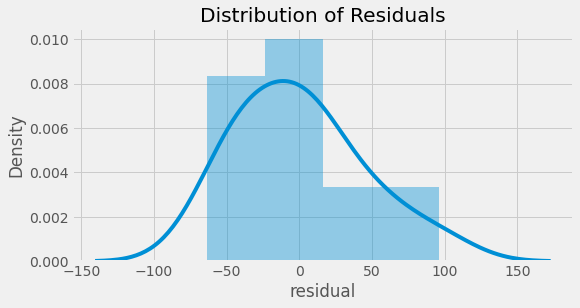

Residuals are normally distributed


In [12]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_pie['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals')
sns.distplot(df_pie['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

From the code above we got our p-value of 0.6644 which can be considered normal because it's above the 0.05 threshold. The histogram plot also show a normal distribution (despite it might be looking a little skewed because we only have 15 observation in our dataset). **From both of those result we can assume that our residual are normally distributed.**

### Multicollinearity

This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data using the `corr()` function from Pandas dataframe. Then we can display it as a heatmap using `heatmap()` function from Seaborn.

Pearson correlation coefficient matrix of each variables:
              pie_sales     price  advertising
pie_sales     1.000000 -0.443273     0.556320
price        -0.443273  1.000000     0.030438
advertising   0.556320  0.030438     1.000000


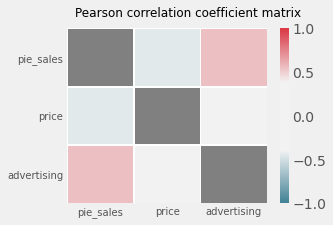

In [13]:
corr = df_pie[['pie_sales', 'price', 'advertising']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

The image shows that there are some positive relationship between advertising and pie_sales and a negative relationship between price and pie_sales. Both of this result support our resulting model from before. Most importanly, notice how the price and advertising have almost 0 correlation coefficient. **This means both of our independent variable are not affecting each other and that there is no multicollinearity in our data.**

### Autocorrelation

Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use `durbin_watson()` function from stats model to calculate our Durbin-Watson value and then check it's value to determine if there is any autocorrelation in the residuals.

In [14]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_pie['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.6831203020921253
Little to no autocorrelation 

Assumption satisfied


Our model got a Durbin-Watson score of about 1.6831 which is between 1.5 and 2.5, **so we can assume that there is no autocorrelation in our residual.**

### Homoscedasticity

This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity we can plot our residual and see if the variance appears to be uniform.

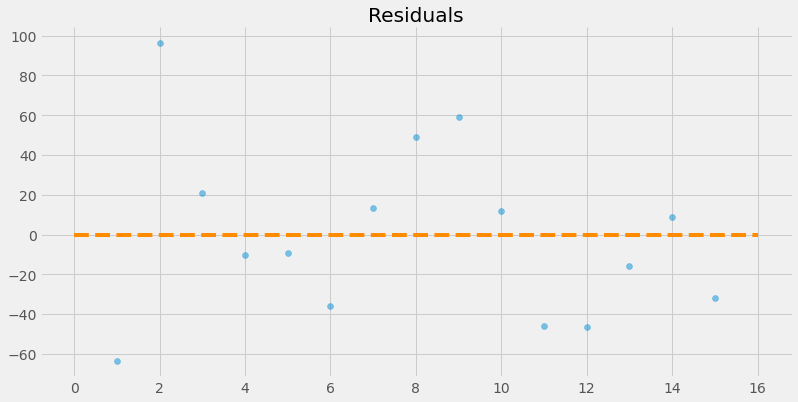

In [15]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_pie.index, y=df_pie.residual, alpha=0.5)
plt.plot(np.repeat(0, len(df_pie.index)+2), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

Despite having only 15 data points our residual seems to have constant variance and **we can assume that it satisfied the homoscedasticity assumption.**

# Conclusion

Our models succesfuly passed all the tests in the model validation steps, so we can conclude that our model can perform well to predict future pie sales by using the two independent variables, price and advertising. But still, our model only have $R^2$ of 52.14%, which means that there is still about 48% unknown factors that are affecting our pie sales.